In [90]:
pip install wooldridge shap

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import wooldridge as wd
import shap

In [92]:
from scipy import stats
from sklearn.utils import resample

In [ ]:
x = np.random.randn(100)

In [ ]:
boot = resample(x, replace=True, n_samples=len(x))

In [ ]:
sample = [resample(x, replace=True, n_samples=len(x)) for _ in range(500)]

In [ ]:
estad = [np.mean(m) for m in sample]



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: ylabel='Density'>

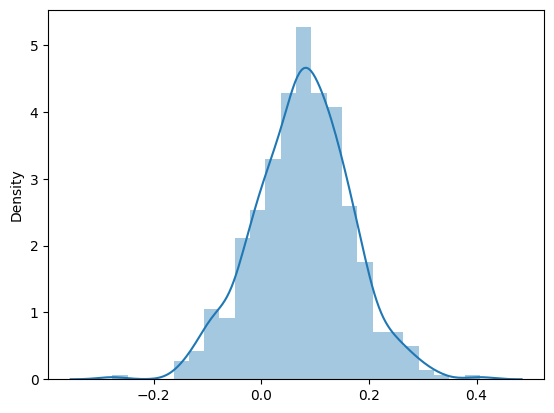

In [ ]:
sns.distplot(estad)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error

In [ ]:
!pip install wooldridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import wooldridge as wd

In [ ]:
train = pd.read_csv ('/content/data_inlf_train.csv')

In [ ]:
test = pd.read_csv('/content/data_inlf_test.csv')

In [ ]:
def metricas(y_test, y_pred):
  print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
  print(f'f1_score: {f1_score(y_test, y_pred)}')

In [ ]:
y = train['inlf']

In [ ]:
x = train.drop(columns= 'inlf')

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(x, y)
y_pred = tree.predict(x)

In [93]:
param_grid = {'max_depth': [2, 4, 6, 8, 10, 12, 14],
              'min_samples_split': [9, 10, 11, 12, 13]}

tree_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=3)

In [94]:
tree_grid.fit(x, y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14],
                         'min_samples_split': [9, 10, 11, 12, 13]})

In [95]:
y_pred = tree_grid.predict(test)

In [96]:
luna = pd.DataFrame(data= y_pred, columns= ['Expected']). reset_index().rename(columns = {'index': 'id'})

In [97]:
luna

,id,Expected
0,0,1
1,1,1
2,2,0
3,3,0
4,4,0
...,...,...
184,184,1
185,185,0
186,186,1
187,187,0


In [98]:
luna.to_csv('taller.csv', index = False)